# <h1><font size='18' color='#0122B2'>O problema:</font></h1>


O Brasil é um pais gigante e extremamente diverso, então o primeiro problema é traçar um perfil estadual para compreender as similaridade e diferenças entre eles

<h1><font size='18' color='#0122B2'>Coleta de Dados:</font></h1>


Como fonte de dados temos uma tabela em csv com um compilado de dados orinduos do IBGE, UNDP, Anatel, ministerio do turismo, Denatram, UBER, MC Donalds e Correios. Há um arquvio chamado Data_Dictionary onde contem a fonte de cada coluna e o ano. 


In [82]:
#importanto as bibliotecas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats
#Configurar estilo escuro para os graficos
plt.style.use('dark_background')

In [2]:
#capturando os dados
cities_dataframe = pd.read_csv('Data/BRAZIL_CITIES.csv', sep=';')
cities_dataframe

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,0,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,...,3.0,51944373.0,276223306.0,2125.0,5064.0,0.0,NaN,NaN,NaN,2.0
5569,Zabelê,PB,0,2075.0,2075.0,0.0,673.0,489.0,184.0,1469.0,...,NaN,NaN,NaN,87.0,162.0,0.0,NaN,NaN,NaN,NaN
5570,Zacarias,SP,0,2335.0,2335.0,0.0,799.0,638.0,161.0,1836.0,...,NaN,NaN,NaN,901.0,346.0,0.0,NaN,NaN,NaN,1.0
5571,Zé Doca,MA,0,50173.0,50152.0,21.0,11886.0,7611.0,4275.0,30803.0,...,3.0,34835818.0,531526331.0,1725.0,11087.0,0.0,NaN,NaN,NaN,1.0


In [3]:
#Tratando os dados
cities_dataframe.fillna(0, inplace=True)
bolean_dict = {0:False,1:True}
cities_dataframe['CAPITAL'].replace(bolean_dict,inplace=True)

In [4]:
cities_dataframe

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,False,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,0.0,0.0,0.0,2158.0,1246.0,0.0,0.0,0.0,0.0,1.0
1,Abadia Dos Dourados,MG,False,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,0.0,0.0,0.0,2227.0,1142.0,0.0,0.0,0.0,0.0,1.0
2,Abadiânia,GO,False,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,0.0,0.0,0.0,3.0
3,Abaeté,MG,False,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,0.0,0.0,0.0,4.0
4,Abaetetuba,PA,False,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,False,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,...,3.0,51944373.0,276223306.0,2125.0,5064.0,0.0,0.0,0.0,0.0,2.0
5569,Zabelê,PB,False,2075.0,2075.0,0.0,673.0,489.0,184.0,1469.0,...,0.0,0.0,0.0,87.0,162.0,0.0,0.0,0.0,0.0,0.0
5570,Zacarias,SP,False,2335.0,2335.0,0.0,799.0,638.0,161.0,1836.0,...,0.0,0.0,0.0,901.0,346.0,0.0,0.0,0.0,0.0,1.0
5571,Zé Doca,MA,False,50173.0,50152.0,21.0,11886.0,7611.0,4275.0,30803.0,...,3.0,34835818.0,531526331.0,1725.0,11087.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Criando um dataframe de dados por estado
states = cities_dataframe['STATE'].unique()
state_dataframe = pd.DataFrame()
state_dataframe['STATE'] = states

In [6]:
#Descobrindo a quantidade de cidades em cada estado
states = cities_dataframe['STATE'].unique()
qty_cities = []
for state in states:
    qty_cities.append(len(cities_dataframe['CITY'][cities_dataframe['STATE']== state]))
state_dataframe['QTY CITIES'] = qty_cities

In [7]:
#Descobrindo a distribuição populacional por estado
total_population = []
for state in states:
 total_population.append(cities_dataframe[['CITY','IBGE_RES_POP']][cities_dataframe['STATE'] == state].sum()[-1])
state_dataframe['TOTAL_POPULATION'] = total_population

In [8]:
#Descobrindo o percentual de cidades e de população
state_dataframe['%CITIES']=round((state_dataframe['QTY CITIES']/state_dataframe['QTY CITIES'].sum())*100,2)
state_dataframe['%POPULATION'] = round((state_dataframe['TOTAL_POPULATION']/state_dataframe['TOTAL_POPULATION'].sum())*100,2)


In [9]:
#Descobrindo a quantidade de cidades com Macdonalds e UBER e o percentual de cidades com acesso à esses serviços
qty_cities_with_uber = []
for state in states:
    qty_cities_with_uber.append(cities_dataframe[['CITY','UBER']][cities_dataframe['UBER']==1][cities_dataframe['STATE']== state].sum()[-1])

state_dataframe['QTY CITIES WITH UBER'] = qty_cities_with_uber
state_dataframe['% CITIES WITH UBER'] = round(state_dataframe['QTY CITIES WITH UBER']/state_dataframe['QTY CITIES']*100,2)

qty_cities_with_mcdonalds = []
for state in states:
    qty_cities_with_mcdonalds.append(cities_dataframe[['CITY','MAC']][cities_dataframe['MAC']>=1][cities_dataframe['STATE']== state].count()[1])

state_dataframe['QTY CITIES WITH MACDONALDS'] = qty_cities_with_mcdonalds
state_dataframe['% CITIES WITH MACDONALDS'] = round(state_dataframe['QTY CITIES WITH MACDONALDS']/state_dataframe['QTY CITIES']*100,2)

D:\Users\Igor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
D:\Users\Igor\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Descobrindo a populaçao urbana composição percentual
urban_pop = []
for state in states:
   urban_pop.append(cities_dataframe[['IBGE_POP']][cities_dataframe['STATE']==state].sum()[0])
state_dataframe['URBAN POPULATION'] = urban_pop
state_dataframe['%URBAN POPULATION'] = round(state_dataframe['URBAN POPULATION']/state_dataframe['TOTAL_POPULATION']*100,2)

In [11]:
#Descobrindo o IDH Medio e Mediano dos estados
idh_mean = []
for state in states:
    idh_mean.append(round(cities_dataframe[['IDHM']][cities_dataframe['STATE']==state].mean()[0],3))
state_dataframe['MEAN IDH'] = idh_mean
idh_median = []
for state in states:
    idh_median.append(round(cities_dataframe[['IDHM']][cities_dataframe['STATE']==state].median()[0],3))
state_dataframe['MEDIAN IDH'] = idh_median


In [12]:
#Adcionando informação de região:
region = ['Centro Oeste','Sudeste','Norte','Nordeste','Nordeste','Sul','Sul','Nordeste','Norte','Nordeste','Nordeste','Nordeste','Sul','Centro Oeste','Norte','Sudeste','Sudeste','Nordeste','Nordeste','Centro Oeste','Norte','Norte','Norte','Norte','Nordeste','Sudeste','Centro Oeste']
state_dataframe['REGION'] = region

#Info de Região no Daframe de cidades:
citie_region = []
for row in range(len(cities_dataframe)):    
   citie_region.append((state_dataframe['REGION'][state_dataframe['STATE'] == cities_dataframe.loc[row][1]]).to_string(index=False)[1:])

cities_dataframe['REGION']=citie_region

<h1><font size='18' color='#0122B2'>Analise dos Dados:</font></h1>

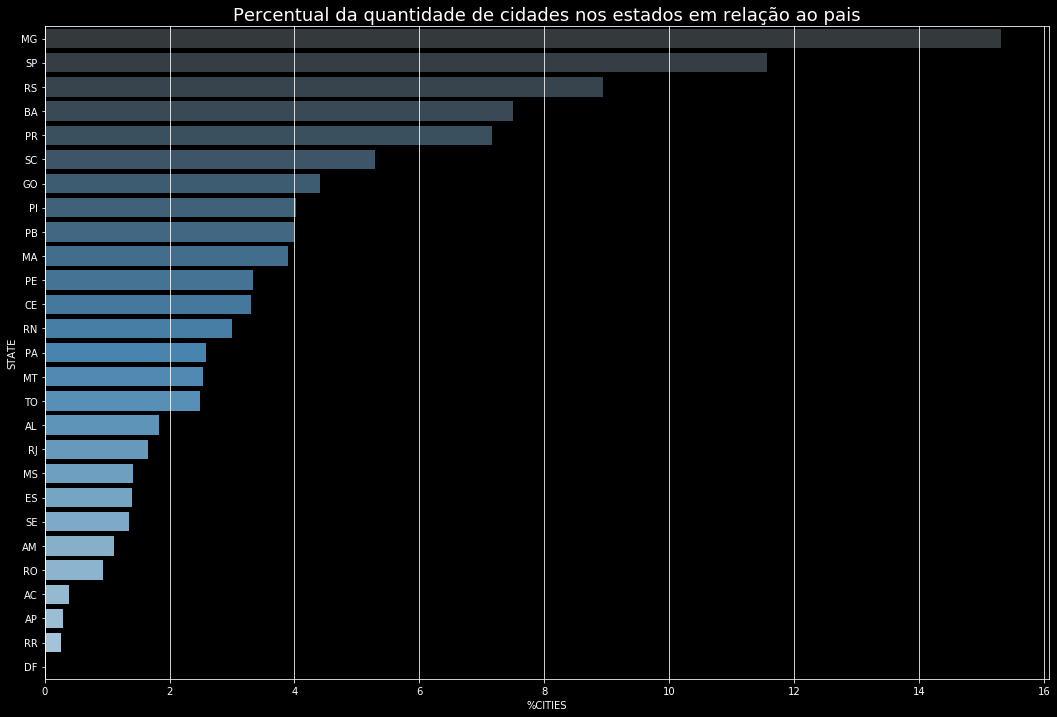

In [13]:
plt.figure(figsize=(18,12))
plt.title('Percentual da quantidade de cidades nos estados em relação ao pais', fontsize=18)
sns.barplot(y='STATE', x='%CITIES', data=state_dataframe.sort_values(by=['%CITIES'],ascending=False),palette="Blues_d")
plt.grid(axis='x', linestyle='-')
plt.show()

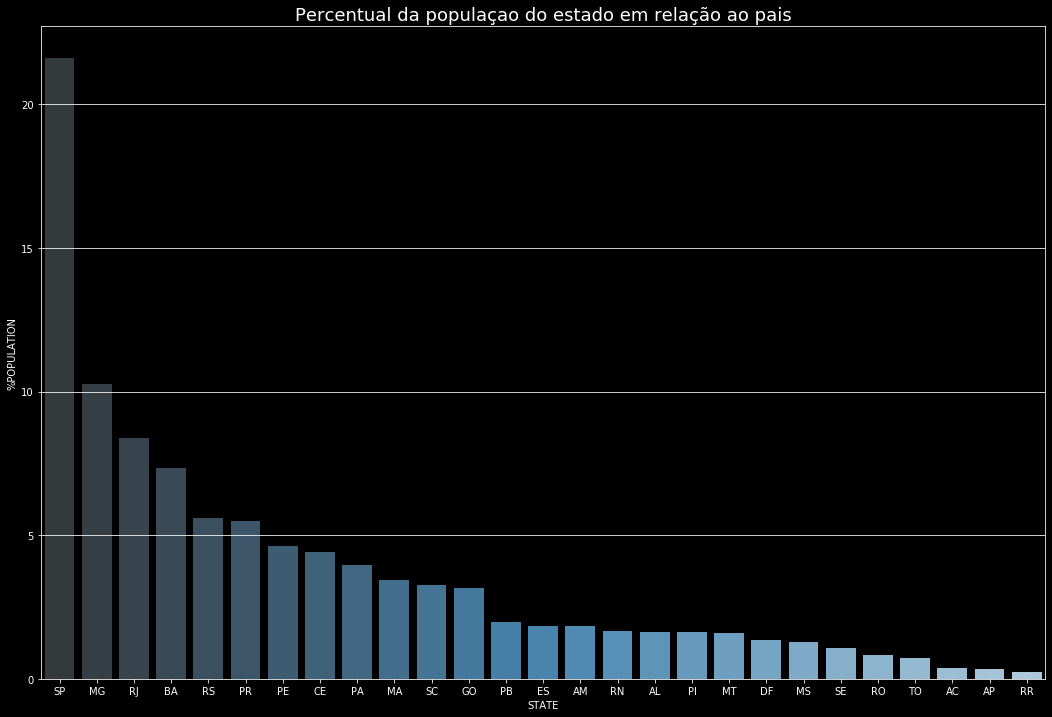

In [14]:
plt.figure(figsize=(18,12))
sns.barplot(x='STATE', y='%POPULATION', data=state_dataframe.sort_values(by=['%POPULATION'],ascending=False),palette="Blues_d")
plt.title('Percentual da populaçao do estado em relação ao pais', fontsize=18)
plt.grid(axis='y',linestyle='-')
plt.show()

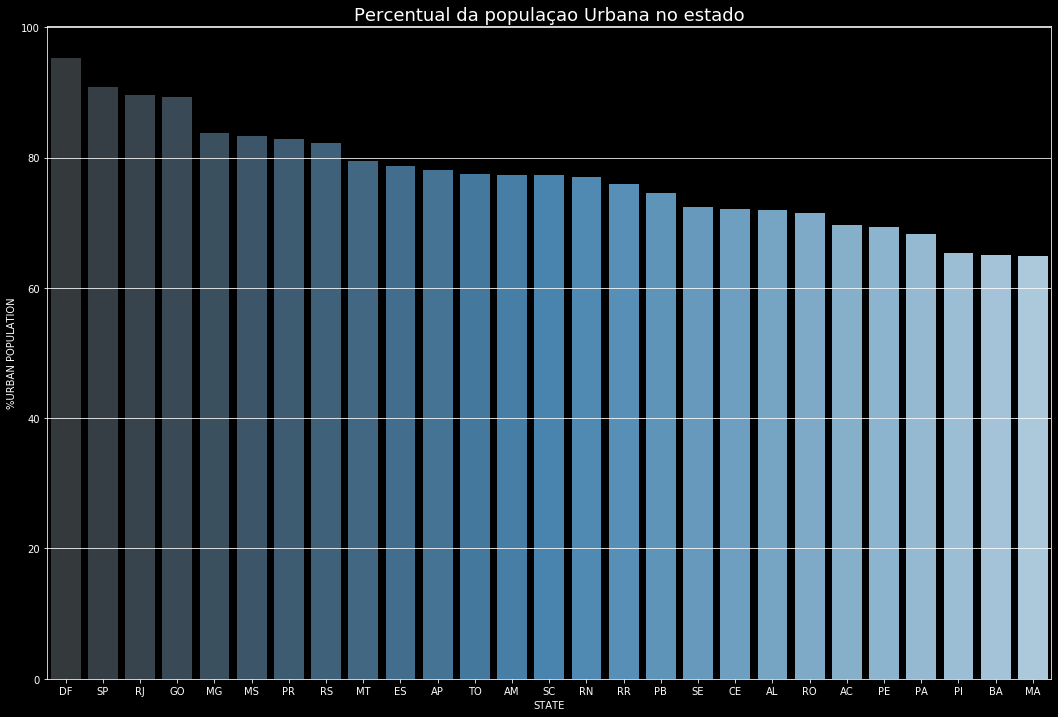

In [15]:
plt.figure(figsize=(18,12))
sns.barplot(x='STATE', y='%URBAN POPULATION', data=state_dataframe.sort_values(by=['%URBAN POPULATION'],ascending=False),palette="Blues_d")
plt.grid(axis='y',linestyle='-')
plt.title('Percentual da populaçao Urbana no estado', fontsize=18)
plt.show()

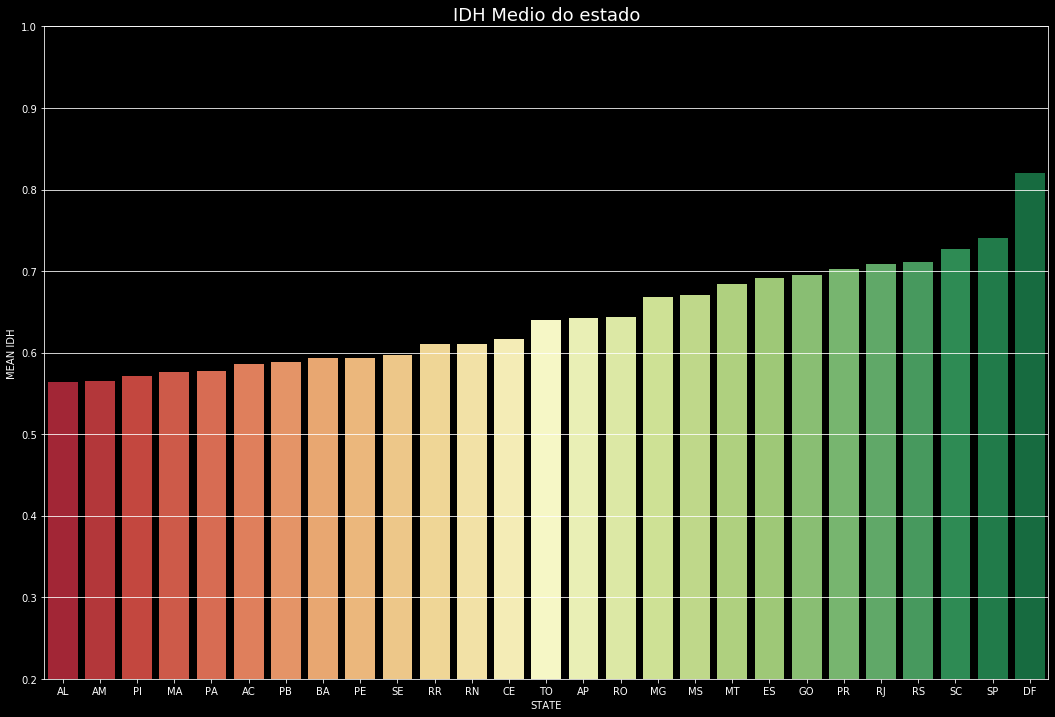

In [16]:
plt.figure(figsize=(18,12))
plt.ylim(0.2,1)
plt.title("IDH por estado")
sns.barplot(x='STATE', y='MEAN IDH', data=state_dataframe.sort_values(by=['MEAN IDH']),palette="RdYlGn")
plt.grid(axis='y',linestyle='-')
plt.title('IDH Medio do estado', fontsize=18)
plt.show()

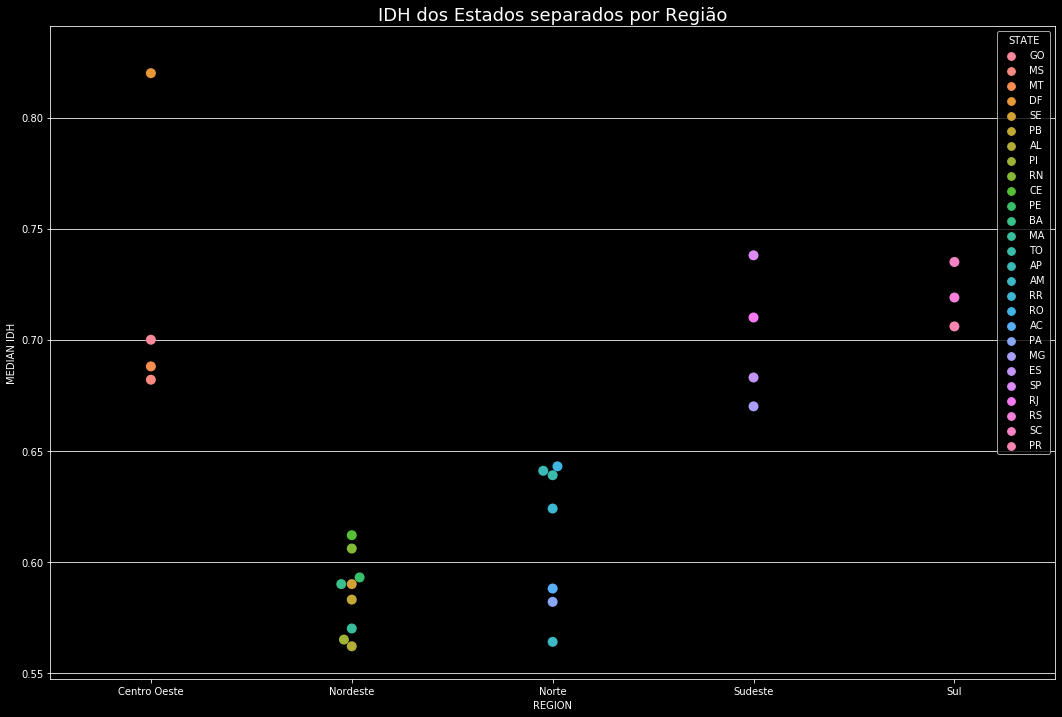

In [18]:
plt.figure(figsize=(18,12))
plt.title('IDH dos Estados separados por Região',fontsize=18)
sns.swarmplot(x='REGION', y='MEDIAN IDH',hue='STATE', data=state_dataframe.sort_values(by=['REGION']),size=10)
plt.grid(axis='y',linestyle='-')

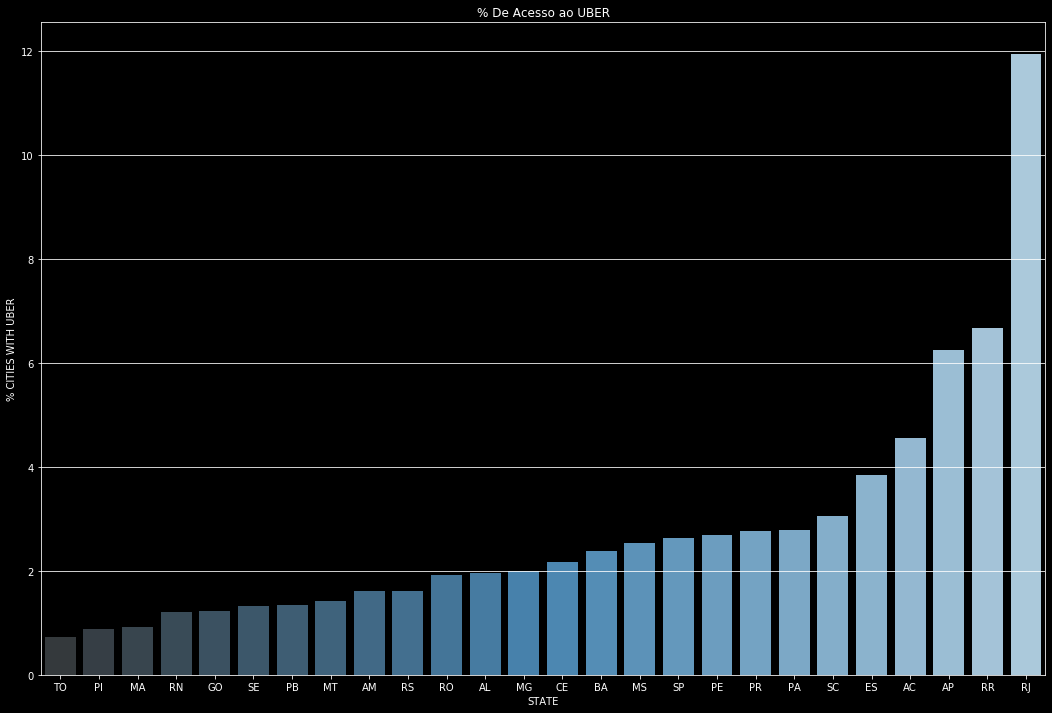

In [19]:
plt.figure(figsize=(18,12))
plt.title("% De Acesso ao UBER")
sns.barplot(x='STATE', y='% CITIES WITH UBER', data=state_dataframe.drop([26]).sort_values(by=['% CITIES WITH UBER']),palette="Blues_d")
plt.grid(axis='y',linestyle='-')
plt.show()

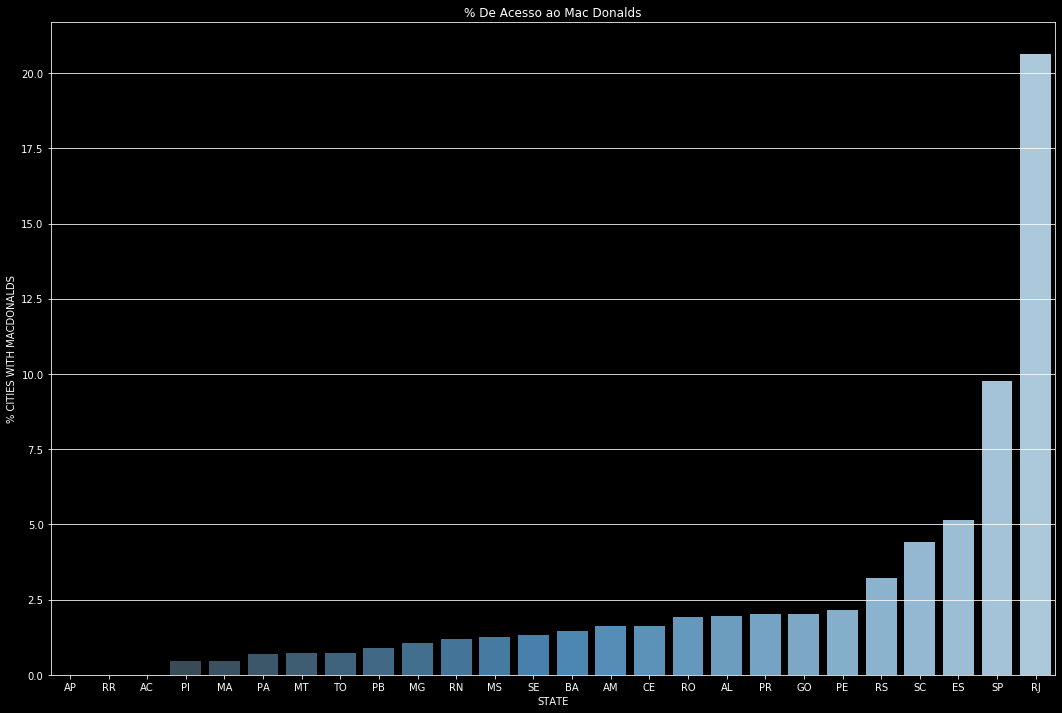

In [20]:
plt.figure(figsize=(18,12))
plt.title("% De Acesso ao Mac Donalds")
sns.barplot(x='STATE', y='% CITIES WITH MACDONALDS', data=state_dataframe.drop([26]).sort_values(by=['% CITIES WITH MACDONALDS']),palette="Blues_d")
plt.grid(axis='y',linestyle='-')
plt.show()

Agora podemos gerar os graficos das cidades, assim podemos obter informações mais precisas e avaliar as nuances dentro do mesmo estado:

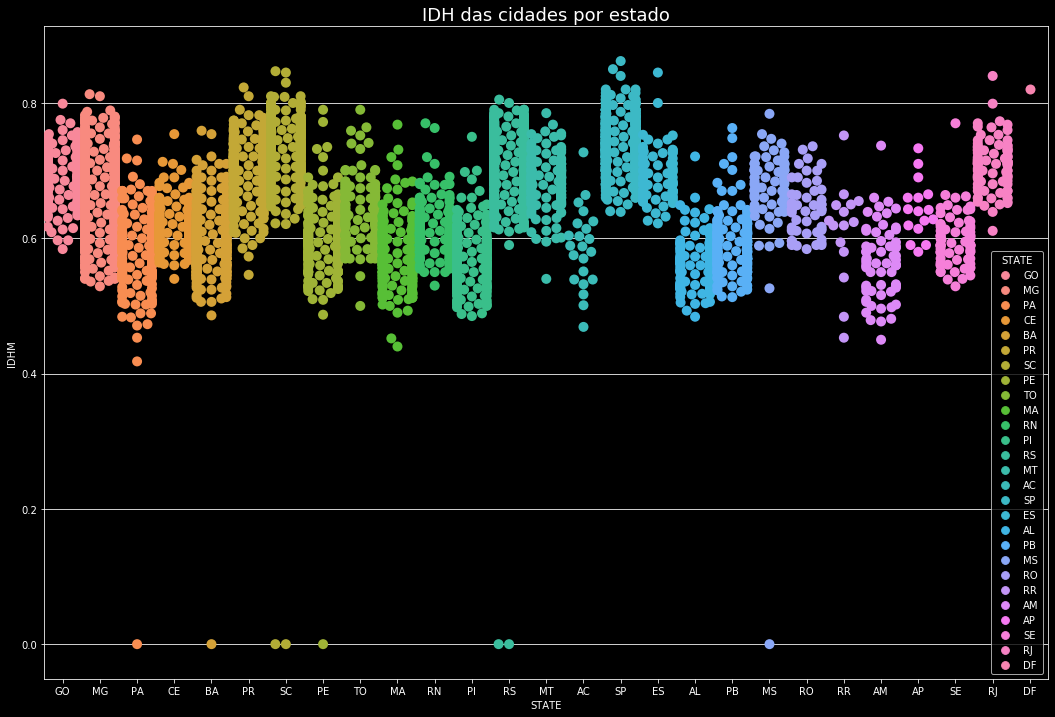

In [21]:
plt.figure(figsize=(18,12))
plt.title('IDH das cidades por estado',fontsize=18)
sns.swarmplot(x='STATE', y='IDHM',hue='STATE', data=cities_dataframe,size=10)
plt.grid(axis='y',linestyle='-')

E as nuances dentro da mesma região:

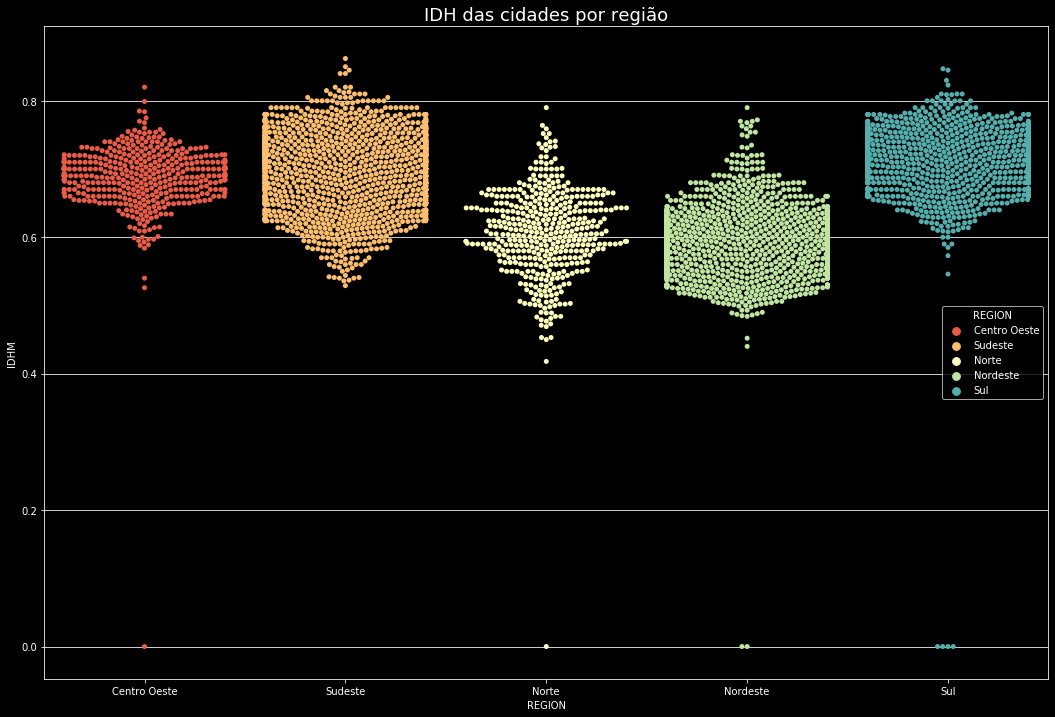

In [22]:
plt.figure(figsize=(18,12))
plt.title('IDH das cidades por região',fontsize=18)
sns.swarmplot(x='REGION', y='IDHM',hue='REGION', data=cities_dataframe, palette="Spectral")
plt.grid(axis='y',linestyle='-')

In [250]:
idh_population_cluster = cities_dataframe[['IDHM','IBGE_RES_POP']]


kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(idh_population_cluster.iloc[:,:-1])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

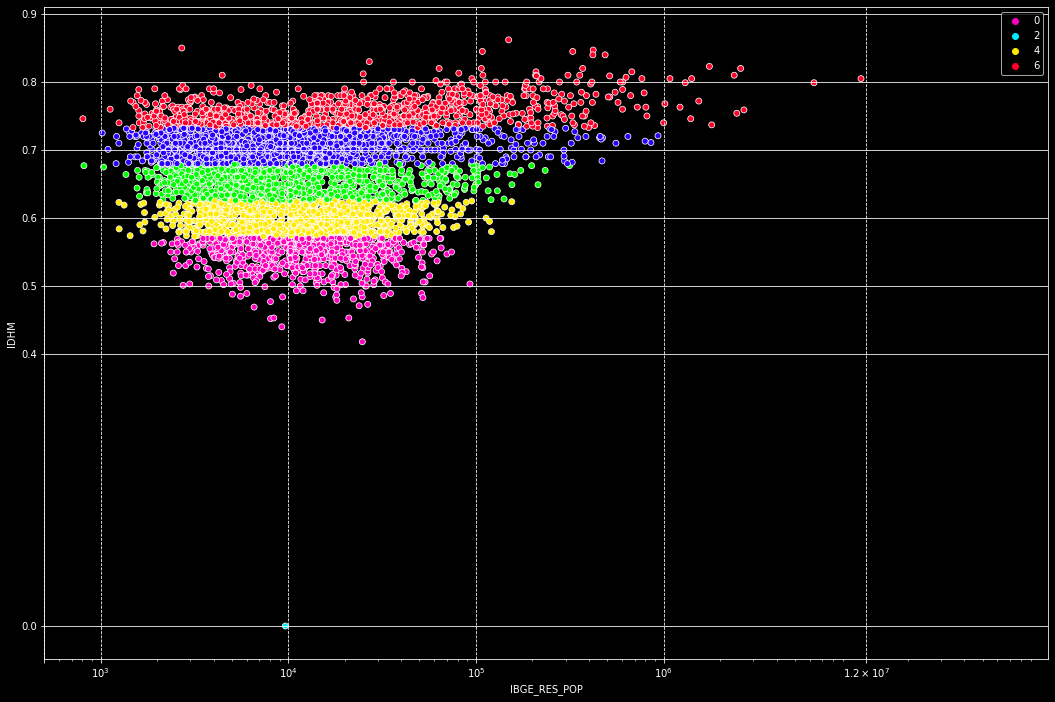

In [251]:
plt.figure(figsize=(18,12))
plt.yticks([0,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.scatterplot(x='IBGE_RES_POP', y='IDHM', data=idh_population_cluster, hue=kmeans.labels_,palette=("gist_rainbow_r"))
plt.xscale('log')
plt.xticks([500,1000,10000,100000,1000000,12000000])
plt.grid(axis='y',linestyle='-')
plt.grid(axis='x',linestyle='--')
plt.show()


Criando a função para teste dos postos sinalizados de Wilcoxon para comparativo de amostras

In [126]:
def wilcoxon(data1,data2):
   wilcoxon_result = scipy.stats.ranksums(data1, data2).pvalue.round(5)
   if wilcoxon_result <= 0.050:
    return print('Resultado do teste: {}'.format(wilcoxon_result) ,'\nAmostras de grupos distintos')
   else:
    return print('Resultado do teste: {}'.format(wilcoxon_result) ,'\nAmostras do mesmo grupo')
    

<h1><font size='18' color='#0122B2'>Resultados:</font></h1>